# Chicago Crime Map

In this notebook we'll continue analysing our Chicago crime dataset, but with a focus on the crime locations and different ways of visualising geographic data. We're going to be using [Matplotlib Basemap](https://matplotlib.org/basemap/).

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # a new dependency

Read the data just like in the previous section

In [2]:
crimes_file_path = 'data/chicago_crime/crimes.csv'
# parsing weather data and make sure we're reading in just the 2016 data
crimes2016 = pd.read_csv(crimes_file_path, index_col=0, parse_dates=True)['2016']
crimes2016.head()

ID Case Number                  Block  IUCR  \
Date                                                            
2016-01-01  10607316    HZ359357    023XX N KIMBALL AVE  0266   
2016-01-01  10496416    HZ237276  018XX W EVERGREEN AVE  1154   
2016-01-01  10419400    HZ157088     064XX S RHODES AVE  1562   
2016-01-01  10501254    HZ240963    005XX N LARAMIE AVE  1752   
2016-01-01  10367959    HZ103735      001XX E WALTON ST  0810   

                          Primary Type  \
Date                                     
2016-01-01         CRIM SEXUAL ASSAULT   
2016-01-01          DECEPTIVE PRACTICE   
2016-01-01                 SEX OFFENSE   
2016-01-01  OFFENSE INVOLVING CHILDREN   
2016-01-01                       THEFT   

                                        Description Location Description  \
Date                                                                       
2016-01-01                                PREDATORY            RESIDENCE   
2016-01-01  FINANCIAL IDENTITY THEFT $300 AND UNDER            APARTMENT   
2016-01-01                AGG CRIMINAL SEXUAL ABUSE            APARTMENT   
2016-01-01            AGG CRIM SEX ABUSE FAM MEMBER            RESIDENCE   
2016-01-01                                OVER $500          HOTEL/MOTEL   

           Arrest Domestic  Beat              ...                Ward  \
Date                                          ...                       
2016-01-01  False     True  1413              ...                35.0   
2016-01-01  False    False  1424              ...                 1.0   
2016-01-01  False     True   312              ...                20.0   
2016-01-01  False    False  1523              ...                28.0   
2016-01-01  False    False  1833              ...                42.0   

            Community Area  FBI Code X Coordinate  Y Coordinate  Year  \
Date                                                                    
2016-01-01            22.0        02    1153320.0     1915322.0  2016   
2016-01-01            24.0        11    1163545.0     1909429.0  2016   
2016-01-01            42.0        17    1181010.0     1862383.0  2016   
2016-01-01            25.0        20    1141611.0     1902863.0  2016   
2016-01-01             8.0        06          NaN           NaN  2016   

                        Updated On   Latitude  Longitude  \
Date                                                       
2016-01-01  02/10/2018 03:50:01 PM  41.923490 -87.712069   
2016-01-01  02/10/2018 03:50:01 PM  41.907110 -87.674665   
2016-01-01  02/10/2018 03:50:01 PM  41.777626 -87.611961   
2016-01-01  02/10/2018 03:50:01 PM  41.889526 -87.755401   
2016-01-01  01/10/2016 08:46:55 AM        NaN        NaN   

                                 Location  
Date                                       
2016-01-01   (41.92348981, -87.712069223)  
2016-01-01  (41.907109594, -87.674665093)  
2016-01-01  (41.777626357, -87.611960915)  
2016-01-01  (41.889525629, -87.755401321)  
2016-01-01                            NaN  

[5 rows x 21 columns]

For every crime incident, we are interested in the latitude and longitude values – the geographic location of the crime.

In [3]:
crimes2016[:5].loc[:, ['Latitude', 'Longitude']]

Latitude  Longitude
Date                            
2016-01-01  41.923490 -87.712069
2016-01-01  41.907110 -87.674665
2016-01-01  41.777626 -87.611961
2016-01-01  41.889526 -87.755401
2016-01-01        NaN        NaN

## Basemap

Let us first show how Matplotlib Basemap can be used for working with spatial data. Basemap doesn't require any external APIs (though as we'll show ArcGIS can be used for fetching more detailed map tiles). The documentation can be found [here](https://matplotlib.org/basemap/) and here is a useful [tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html).

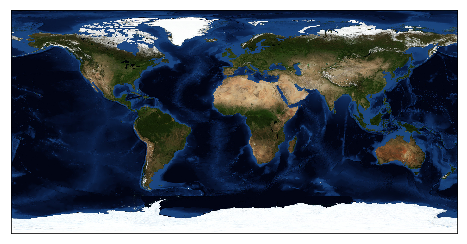

In [4]:
plt.figure(figsize=(8, 8))
m = Basemap()
m.bluemarble(scale=0.5)
plt.show()

Basesemap has lots of projections. For a full list see [the docs](https://matplotlib.org/basemap/users/mapsetup.html).

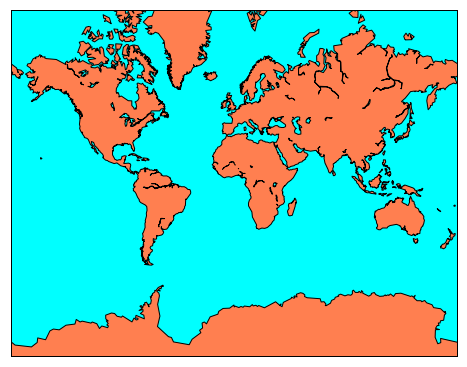

In [5]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
plt.show()

### Zooming in

Let's zoom into Chicago… Google Maps is useful for getting the exact latitude and longitude coordinates of certain points (e.g. the corners of a frame of the map we want to show)

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=271135.03996665304,506586.80946384603,426261.3796491339,646105.8783783929&bboxSR=2790&imageSR=2790&size=2000,1798&dpi=96&format=png32&f=image


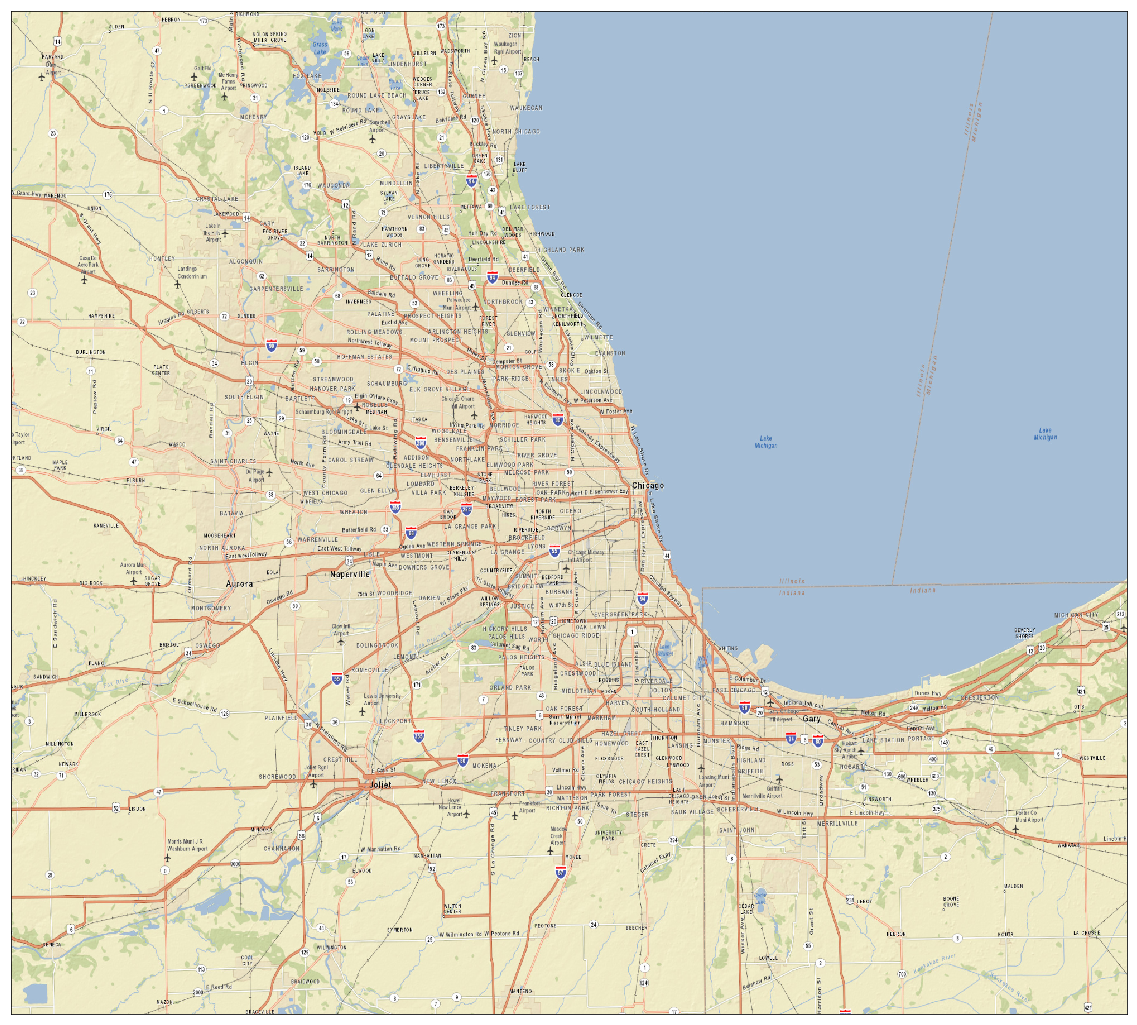

In [6]:
# 41.229510, -88.677617 - lower left
# 42.475900, -86.797856 - upper right

fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='merc',
            llcrnrlat=41.229510, llcrnrlon=-88.677617, # lower left
            urcrnrlat=42.475900, urcrnrlon=-86.797856, # upper right
            lat_ts=41.5, # latitude of true scale
            resolution='l', # full resolution
            epsg=2790) # the EPSG code for East Illinois obtained from http://spatialreference.org/ref/epsg/2790/

# m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
# m.drawmapboundary(fill_color='aqua')
# m.etopo(scale=0.5, alpha=0.5)

# this method uses the ArcGIS API to download the map tiles and place them correctly
m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 2000, verbose= True)

plt.show()

### Overlaying spatial information

Now we can plot additional data onto the graph, like points on some coordinates.

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=271135.03996665304,506586.80946384603,426261.3796491339,646105.8783783929&bboxSR=2790&imageSR=2790&size=2000,1798&dpi=96&format=png32&f=image


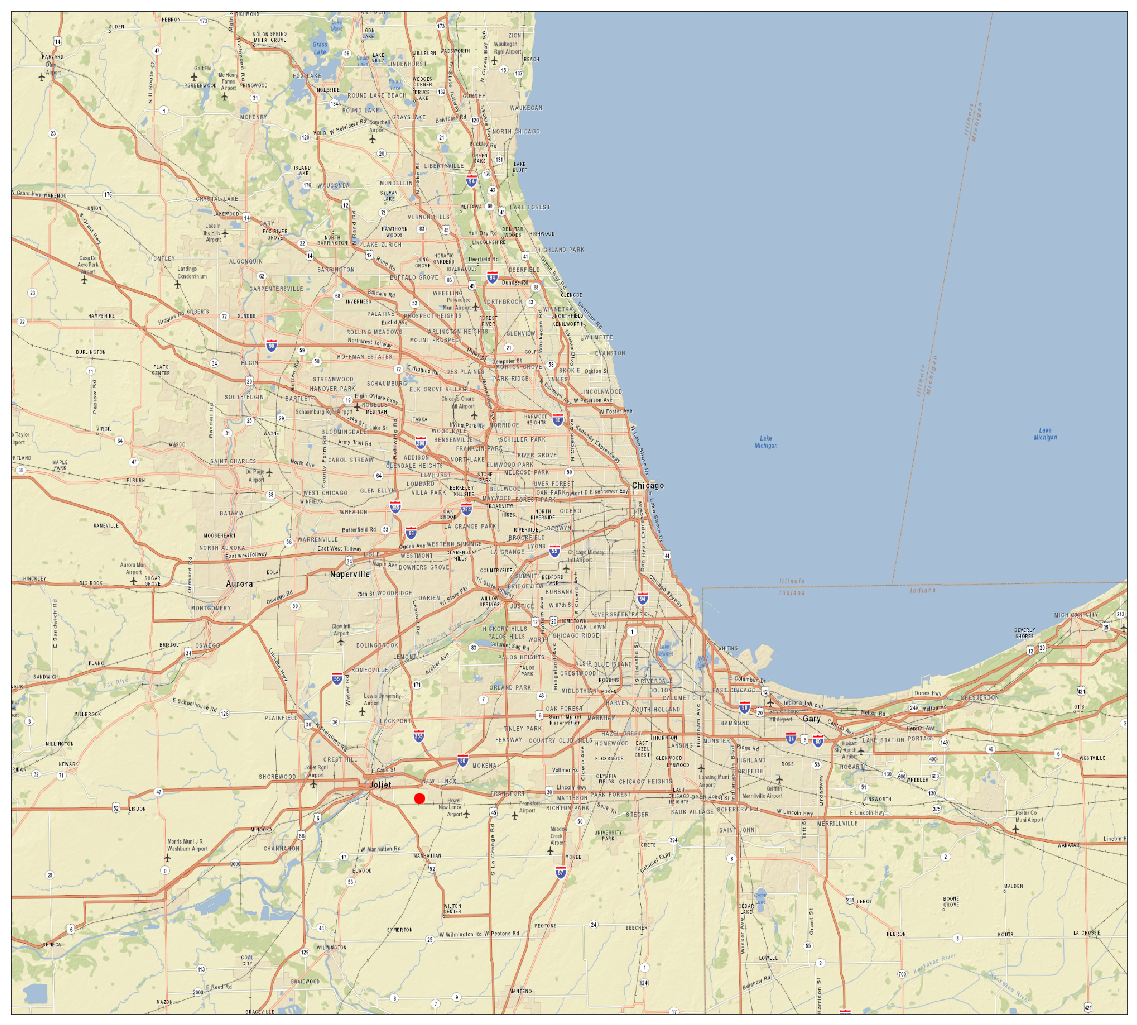

In [7]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='merc',
            llcrnrlat=41.229510, llcrnrlon=-88.677617, # lower left
            urcrnrlat=42.475900, urcrnrlon=-86.797856, # upper right
            lat_ts=41.5, # latitude of true scale
            resolution='l', # full resolution
            epsg=2790) # the EPSG code for East Illinois obtained from http://spatialreference.org/ref/epsg/2790/

x, y = m(-88, 41.5) # lon, lat <- be careful, the order is a bit odd!

# this method uses the ArcGIS API to download the map tiles and place them correctly
m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 2000, verbose= True)

m.plot(x, y, 'ro', markersize=10)

plt.show()

Now let's remind ourselves what spatial information do we have in our crimes dataset.

In [8]:
crimes2016.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [9]:
crimes2016['Latitude'][:5]

Date
2016-01-01    41.923490
2016-01-01    41.907110
2016-01-01    41.777626
2016-01-01    41.889526
2016-01-01          NaN
Name: Latitude, dtype: float64

In [10]:
crimes2016['Longitude'][:5]

Date
2016-01-01   -87.712069
2016-01-01   -87.674665
2016-01-01   -87.611961
2016-01-01   -87.755401
2016-01-01          NaN
Name: Longitude, dtype: float64

This is how we can plot that information on the map.

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=327788.5231513261,547729.6268764517,385476.6219850429,603726.5436476511&bboxSR=2790&imageSR=2790&size=2000,1941&dpi=96&format=png32&f=image


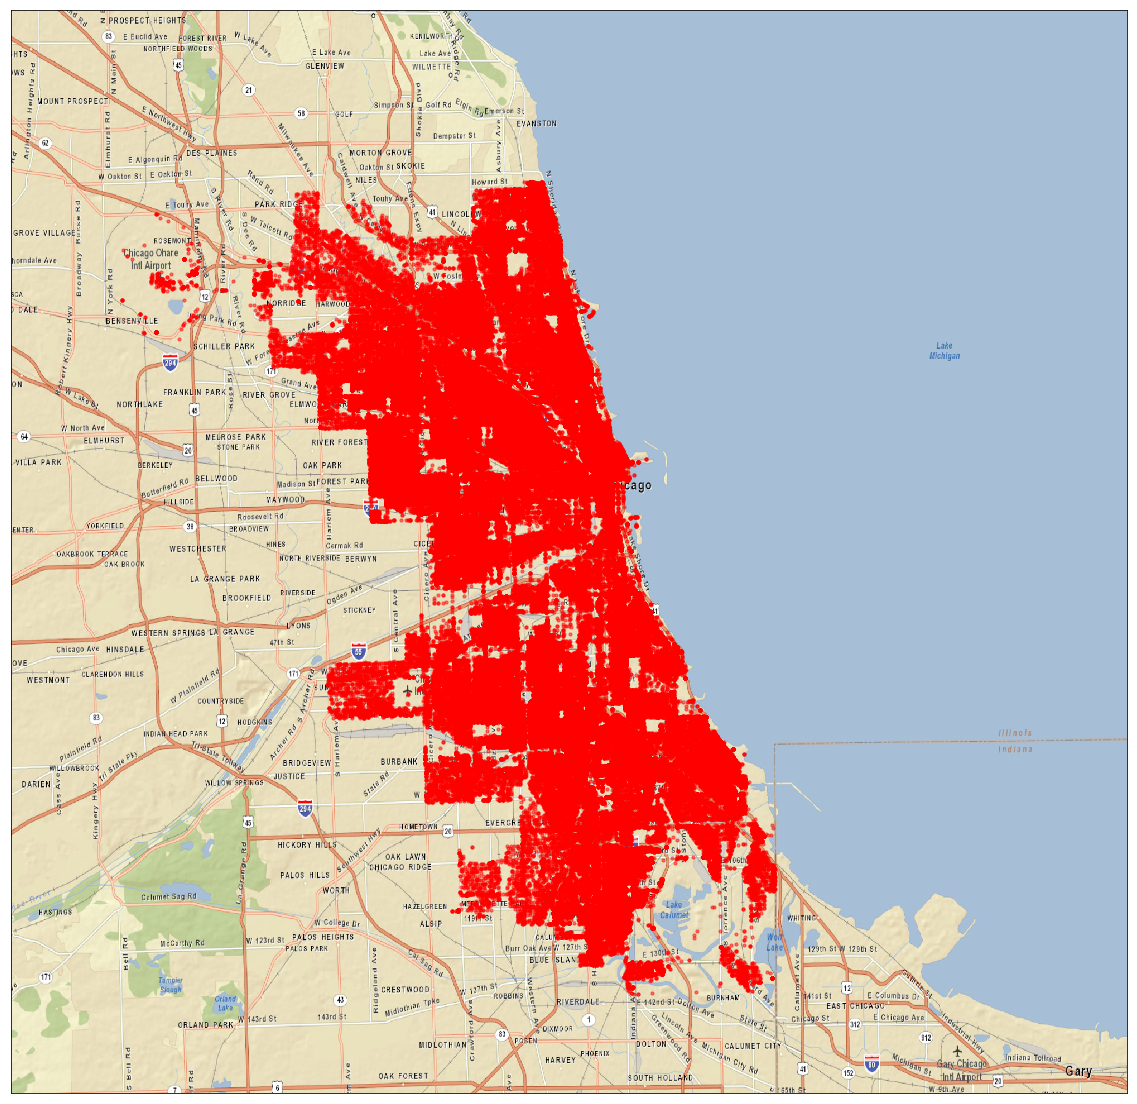

In [11]:
def plot_map(xpixels=200):
    fig = plt.figure(figsize=(20, 20))
    m = Basemap(projection='merc',
                llcrnrlat=41.6, llcrnrlon=-88.0, # lower left
                urcrnrlat=42.1, urcrnrlon=-87.3, # upper right
                lat_ts=41.5, # latitude of true scale
                resolution='l', # full resolution
                epsg=2790) # the EPSG code for East Illinois obtained from http://spatialreference.org/ref/epsg/2790/

    x, y = m(-88, 41.5) # lon, lat <- be careful, the order is a bit odd!

    # this method uses the ArcGIS API to download the map tiles and place them correctly
    m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 2000, verbose= True)
    #m.drawcoastlines()

    return m

m = plot_map(xpixels=200)

# we can limit the number of points
# n = 100
# lons = crimes2016['Longitude'][:n].values
# lats = crimes2016['Latitude'][:n].values

lons = crimes2016['Longitude'].values
lats = crimes2016['Latitude'].values
x, y = m(lons,lats)
m.scatter(x, y, 10, marker='o', color='r', alpha=0.5)

plt.show()

That's a lot of data points. Let's see if filtering by type would give us some more insightful views. First we'll fetch the table to grouped by crime type again (that we've explained in the previous sections already).

In [12]:
crimes_mi = crimes2016.set_index(['Primary Type'], append=True)
crimes_mi['ocurrences'] = np.ones(len(crimes_mi), dtype=int)
crimes_grouped = crimes_mi.ocurrences.groupby(level=[0,1]).sum()
crimes_by_type = crimes_grouped.unstack(level=1).fillna(0).resample('h').sum().fillna(0).astype(int)
crimes_by_type.head()

Primary Type         ARSON  ASSAULT  BATTERY  BURGLARY  \
Date                                                     
2016-01-01 00:00:00      0        4       21         2   
2016-01-01 01:00:00      0        3       22         2   
2016-01-01 02:00:00      0        5       29         0   
2016-01-01 03:00:00      1        3       21         1   
2016-01-01 04:00:00      0        1       11         0   

Primary Type         CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
Date                                                                          
2016-01-01 00:00:00                                  0                   24   
2016-01-01 01:00:00                                  0                    2   
2016-01-01 02:00:00                                  0                    0   
2016-01-01 03:00:00                                  0                    0   
2016-01-01 04:00:00                                  0                    1   

Primary Type         CRIMINAL DAMAGE  CRIMINAL TRESPASS  DECEPTIVE PRACTICE  \
Date                                                                          
2016-01-01 00:00:00               24                  0                  46   
2016-01-01 01:00:00                6                  1                   1   
2016-01-01 02:00:00                9                  0                   3   
2016-01-01 03:00:00                4                  0                   4   
2016-01-01 04:00:00                5                  0                   4   

Primary Type         GAMBLING        ...          OTHER NARCOTIC VIOLATION  \
Date                                 ...                                     
2016-01-01 00:00:00         0        ...                                 0   
2016-01-01 01:00:00         0        ...                                 0   
2016-01-01 02:00:00         0        ...                                 0   
2016-01-01 03:00:00         0        ...                                 0   
2016-01-01 04:00:00         0        ...                                 0   

Primary Type         OTHER OFFENSE  PROSTITUTION  PUBLIC INDECENCY  \
Date                                                                 
2016-01-01 00:00:00             11             0                 0   
2016-01-01 01:00:00              0             0                 0   
2016-01-01 02:00:00              1             0                 0   
2016-01-01 03:00:00              2             0                 0   
2016-01-01 04:00:00              1             0                 0   

Primary Type         PUBLIC PEACE VIOLATION  ROBBERY  SEX OFFENSE  STALKING  \
Date                                                                          
2016-01-01 00:00:00                       0        1           34         0   
2016-01-01 01:00:00                       0        3            2         0   
2016-01-01 02:00:00                       1        1            0         0   
2016-01-01 03:00:00                       0        2            0         0   
2016-01-01 04:00:00                       0        1            0         0   

Primary Type         THEFT  WEAPONS VIOLATION  
Date                                           
2016-01-01 00:00:00     19                  2  
2016-01-01 01:00:00     10                  0  
2016-01-01 02:00:00     11                  1  
2016-01-01 03:00:00      4                  1  
2016-01-01 04:00:00      6                  0  

[5 rows x 33 columns]

Then we'll create an interactive widget that allows us to filter the crime type and only draw that on the map.

In [13]:
from ipywidgets import interact

@interact(crime_type = crimes_by_type.columns)
def plot_map_and_data(crime_type='THEFT'):
    m = plot_map(xpixels=2000)

    lons = crimes2016[crimes2016['Primary Type'] == crime_type]['Longitude'].values
    lats = crimes2016[crimes2016['Primary Type'] == crime_type]['Latitude'].values
    x, y = m(lons,lats)
    m.scatter(x, y, 10, marker='o', color='r', alpha=0.5)

interactive(children=(Dropdown(description='crime_type', index=31, options=('ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION', 'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'), value='THEFT'), Output()), _dom_classes=('widget-interact',))

As a homework assignment, try making a similar selector for choosing the season (spring, summer, autumn, winter) and see if that gives us some more useful insights.

## Plotly maps

[Plotly](https://plot.ly/) is an open source plotting library for offline and online interactive plots that integrates with Jupyter Notebook. This short [cheat sheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf) gives you a quick overview of the main features.

[Full API reference for Python](https://plot.ly/python/reference/)

As they have an API for some parts of the functionality, you will need to register and copy your username and [API key](https://plot.ly/settings/api).

In [14]:
import plotly
# replace these two arguments with your Plotly username & API key on https://plot.ly/settings/api
plotly.tools.set_credentials_file(username='metakermit', api_key='V7odwoNQD0Nc1fj84Xjm')

Sample Plotly plot

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = [trace0, trace1]

py.iplot(data, filename = 'basic-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~metakermit/0 or inside your plot.ly account where it is named 'basic-line'


Now let's create a Plotly map

In [16]:
homicide_lats = crimes2016[crimes2016['Primary Type'] == 'HOMICIDE']['Latitude'].values
homicide_lons = crimes2016[crimes2016['Primary Type'] == 'HOMICIDE']['Longitude'].values

data = [dict(
    type = 'scattergeo',
    lon = homicide_lons,
    lat = homicide_lats,
    mode = 'markers',
    marker = dict(
        size = 8,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = False,
        symbol = 'square',
        line = dict(
            width=1,
            color='rgba(102, 102, 102)'
        ),
    )
)]

fig = dict(data=data)
py.iplot(fig, validate=True)

But can we show the street names etc.? Sure, but we'll need to connect Mapbox. Go [create a Mapbox account](https://www.mapbox.com/studio), copy its [API token](https://www.mapbox.com/account/access-tokens) and add it to [Plotly](https://plot.ly/settings/mapbox#/).

In [17]:
data = [
    go.Scattermapbox(
        lat=homicide_lats,
        lon=homicide_lons,
        mode='markers',
        marker=dict(
            size=10
        ),
        text=['Montreal'],
    )
]
layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        bearing=0,
        center=dict(
            lat=42,
            lon=-88
        ),
        pitch=0,
        zoom=9
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

… and this gives a zoomable interactive map showing where all the homicide incidents are in Chicago.